source: https://blog.keras.io/building-autoencoders-in-keras.html

## Preparation

Load dependencies

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense

from tensorflow.keras.datasets import mnist

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Viz function:

In [ ]:
# use Matplotlib
import matplotlib.pyplot as plt

def plot_results(original_imgs, decoded_imgs):
  n = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(original_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

## The MNIST dataset

The MNIST dataset contains a collection of hand-written digits.

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Eeach digit is an grayscale image with size 28 X 28 pixels.

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


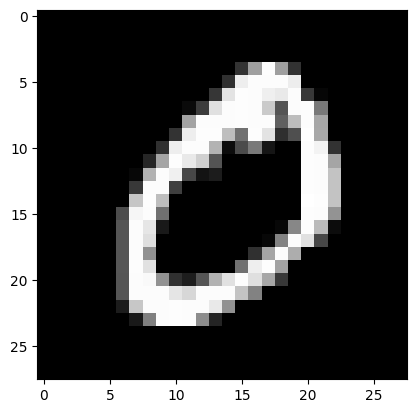

In [ ]:
plt.imshow(x_train[1], cmap='gray')

## The Autoencoder

### What it is:

An Autoencoder is a special type of neural network, that can be seen as a data compression algorithm.

![alt text](https://www.dropbox.com/s/yqal5kwmaa1voov/AE_images-01.png?dl=0)

The autoencoder is used to automatically learn low dimensional representations of specific data.

Practical applications of autoencoders include dimensionality reduction for data visualization and image denoising.

### How it works:

An Autoencoder has two parts:
* the encoder: takes the original input - in our case an image of a number - and converts it in a lower dimension vector
* the decoder takes as an input the lower dimension vector and converts it back to the original input.

![alt text](https://drive.google.com/uc?id=1AFvFJx7saZIVVGtXNTyRFkzGJQWaiLKL)

## Basic Autoencoder

### Create model

In [ ]:
encoding_dim = 32

autoencoder = tf.keras.Sequential()
autoencoder.add(Input(shape=784))
autoencoder.add(Dense(encoding_dim, activation='relu'))
autoencoder.add(Dense(784, activation='sigmoid'))


In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1, rho=0.95), loss='binary_crossentropy')

### Format Data

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Train

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 6s 6ms/step - loss: 0.3648 - val_loss: 0.2715
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2649 - val_loss: 0.2547
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2442 - val_loss: 0.2310
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2228 - val_loss: 0.2123
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2073 - val_loss: 0.1996
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1962 - val_loss: 0.1900
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1875 - val_loss: 0.1822
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1803 - val_loss: 0.1758
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1743 - val_loss: 0.1703
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1692 - val_loss: 0.1655

### Test

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


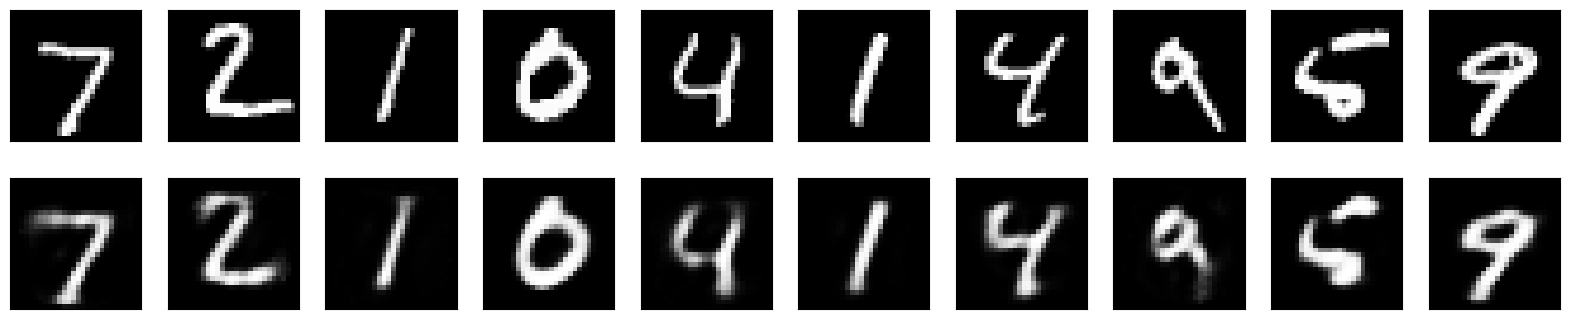

In [ ]:
plot_results(x_test, decoded_imgs)

## A Deeper Autoencoder

In [ ]:
autoencoder_deep = tf.keras.Sequential()
autoencoder_deep.add(Input(shape=784))
autoencoder_deep.add(Dense(128, activation='relu'))
autoencoder_deep.add(Dense(64, activation='relu'))
autoencoder_deep.add(Dense(32, activation='relu'))

autoencoder_deep.add(Dense(64, activation='relu'))
autoencoder_deep.add(Dense(128, activation='relu'))
autoencoder_deep.add(Dense(784, activation='sigmoid'))

In [ ]:
autoencoder_deep.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1, rho=0.95), loss='binary_crossentropy')

autoencoder_deep.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 8ms/step - loss: 0.3225 - val_loss: 0.2620
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2549 - val_loss: 0.2464
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2351 - val_loss: 0.2218
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2109 - val_loss: 0.1993
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1925 - val_loss: 0.1866
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1829 - val_loss: 0.1788
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1769 - val_loss: 0.1720
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1708 - val_loss: 0.1674
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1651 - val_loss: 0.1621
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1597 - val_lo

In [ ]:
decoded_imgs_deep = autoencoder_deep.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


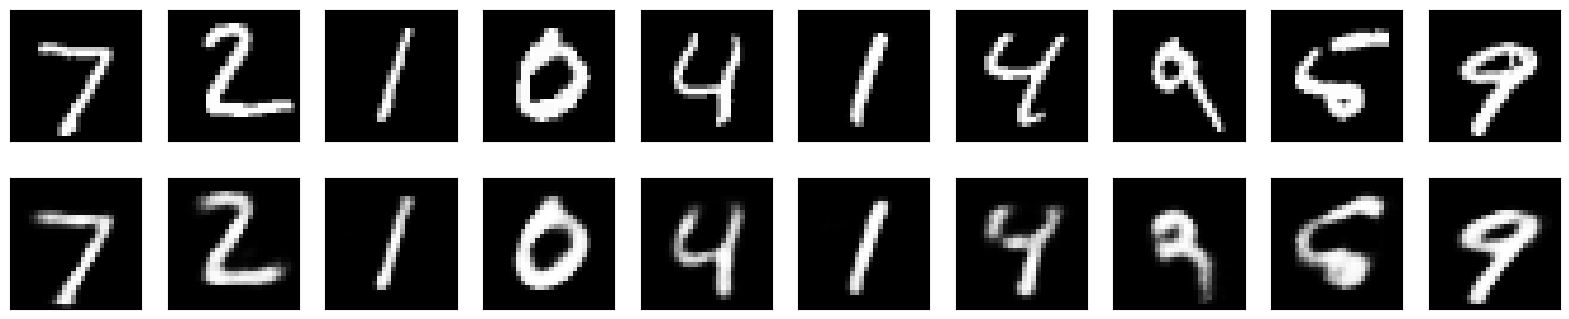

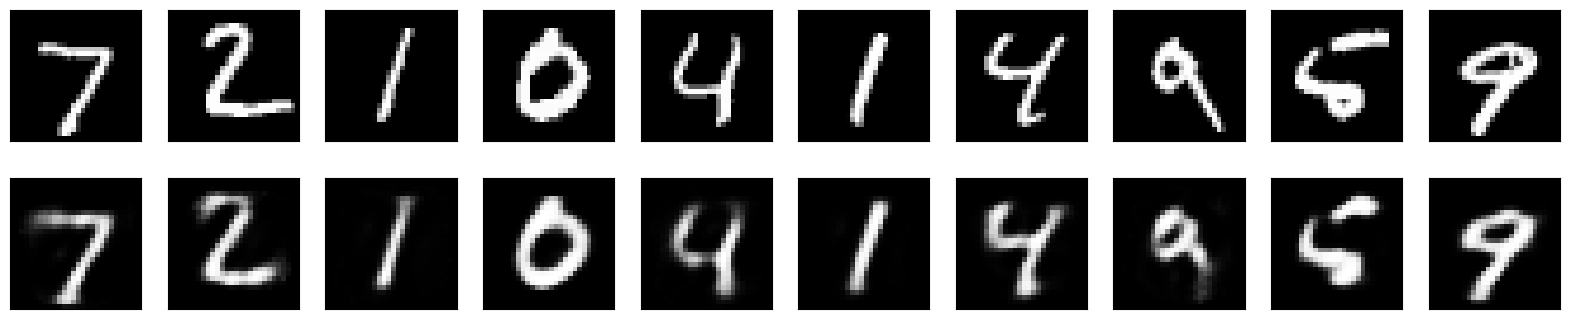

In [ ]:
plot_results(x_test, decoded_imgs_deep)
plot_results(x_test, decoded_imgs)

## Convolutional Autoencoder

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

In [ ]:
conv_autoencoder = tf.keras.Sequential()

# first we create the encoder part
conv_autoencoder.add(Input(shape=(28, 28, 1)))

conv_autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
conv_autoencoder.add(MaxPooling2D((2, 2), padding='same'))

conv_autoencoder.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'))
conv_autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

conv_autoencoder.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'))
conv_autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# now we create the decoder part
conv_autoencoder.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'))
conv_autoencoder.add(UpSampling2D(size=(2, 2)))

# conv and upsampling
conv_autoencoder.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'))
conv_autoencoder.add(UpSampling2D(size=(2, 2)))

# conv and upsampling
conv_autoencoder.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
conv_autoencoder.add(UpSampling2D(size=(2, 2)))

# conv - output
conv_autoencoder.add(Conv2D(1, kernel_size=(3, 3), activation='relu', padding='same'))

conv_autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1, rho=0.95),
                         loss='binary_crossentropy')

conv_autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 8)          

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
conv_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 11s 9ms/step - loss: 0.2318 - val_loss: 0.1985
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1904 - val_loss: 0.1798
Epoch 3/50
469/469 [==============================] - 4s 7ms/step - loss: 0.1773 - val_loss: 0.1684
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1684 - val_loss: 0.1716
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1643 - val_loss: 0.1552
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1594 - val_loss: 0.1524
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1557 - val_loss: 0.1496
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1527 - val_loss: 0.1465
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1503 - val_loss: 0.1469
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1499 - val_loss: 0.149

313/313 [==============================] - 1s 2ms/step


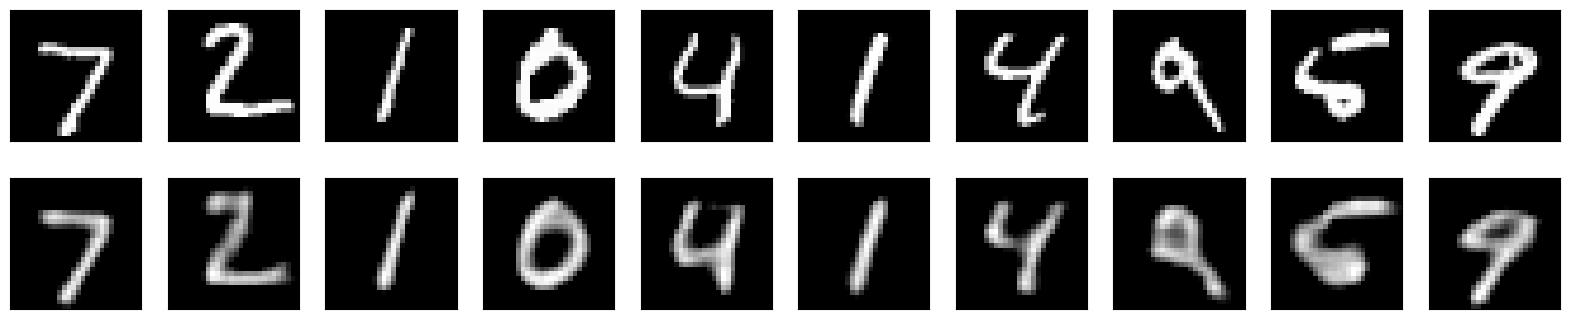

In [ ]:
plot_results(x_test, conv_autoencoder.predict(x_test))

## De-Noising Autoencoder

Add noise to the data

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

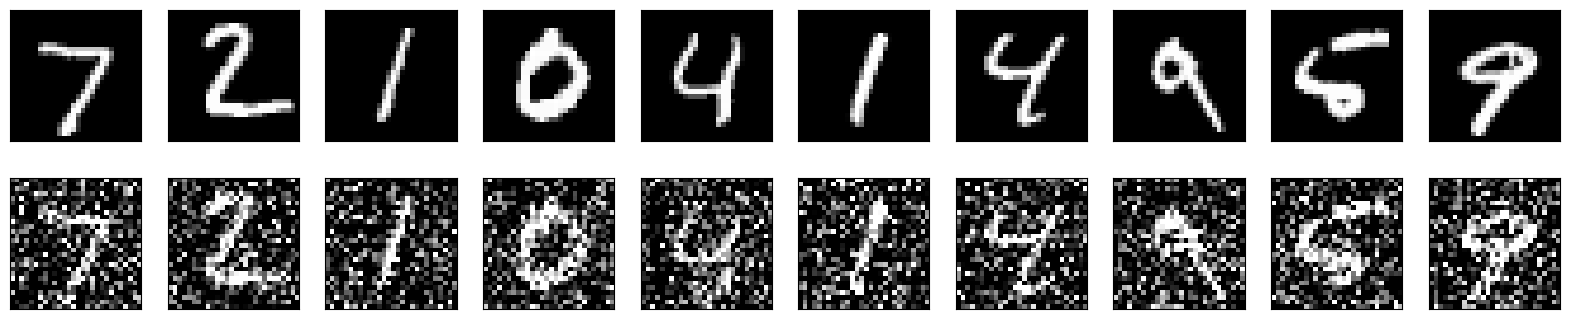

In [ ]:
plot_results(x_test, x_test_noisy)

Create model

In [ ]:
denoising_ae = tf.keras.Sequential()

denoising_ae.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
                        input_shape=(28, 28, 1)))
denoising_ae.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

denoising_ae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
denoising_ae.add(MaxPooling2D((2, 2), padding='same'))


denoising_ae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
denoising_ae.add(UpSampling2D((2, 2)))

denoising_ae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
denoising_ae.add(UpSampling2D((2, 2)))

denoising_ae.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

denoising_ae.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1, rho=0.95), loss='binary_crossentropy')
denoising_ae.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 up_sampling2d_3 (UpSamplin  (None, 14, 14, 32)       

Train and plot results

In [ ]:
denoising_ae.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
469/469 [==============================] - 5s 7ms/step - loss: 0.1765 - val_loss: 0.1229
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1196 - val_loss: 0.1115
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1124 - val_loss: 0.1063
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1086 - val_loss: 0.1052
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1061 - val_loss: 0.1028
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1046 - val_loss: 0.1027
Epoch 7/50
469/469 [==============================] - 4s 7ms/step - loss: 0.1034 - val_loss: 0.1027
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1024 - val_loss: 0.1001
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1016 - val_loss: 0.1007
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1011 - val_loss: 0.0995

313/313 [==============================] - 1s 2ms/step


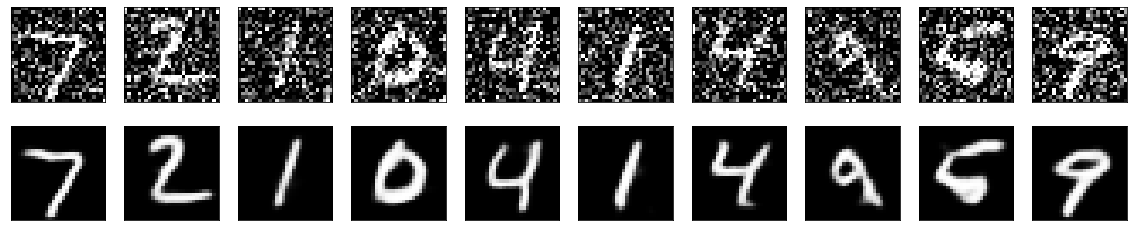

In [ ]:
plot_results(x_test_noisy, denoising_ae.predict(x_test_noisy))